## Loading Library

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [22]:
#1

df = pd.read_csv('https://raw.githubusercontent.com/iwakkk/Data-Mining-Dataset/refs/heads/main/bread%20basket.csv')

df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [23]:
#2 info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
#3 check missing values

df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

4. No missing values from the dataset. Showing that the dataset is clean.

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-25-b2e2be649a7f>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date_time']).dt.date


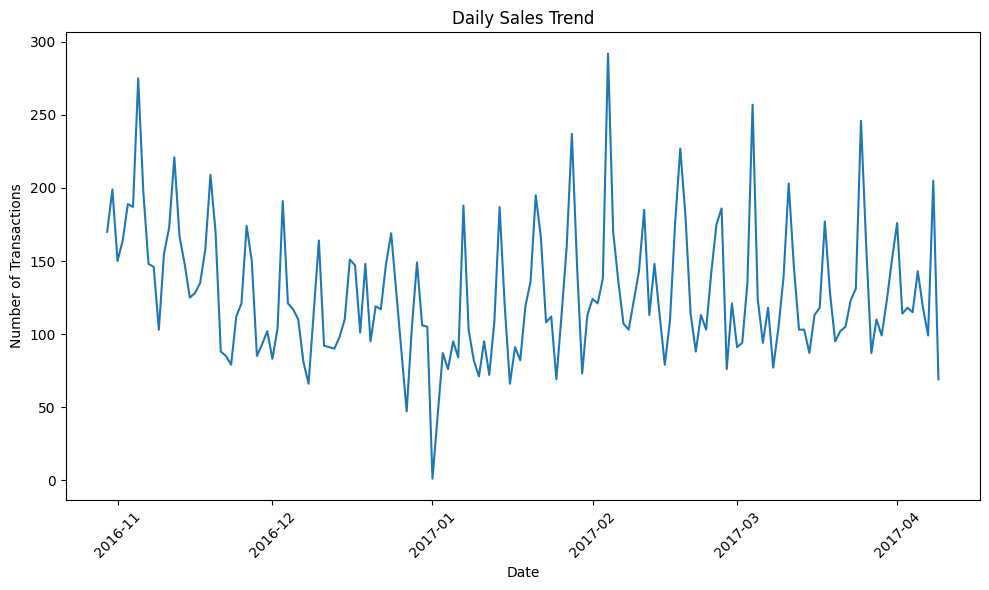

In [25]:
# 5
df['date'] = pd.to_datetime(df['date_time']).dt.date

daily_sales = df.groupby('date').size()

plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Transactions', linestyle='-', marker='')

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Sales Trend')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [26]:
# 6
df['day'] = pd.to_datetime(df['date_time']).dt.day
df['month'] = pd.to_datetime(df['date_time']).dt.month
df['year'] = pd.to_datetime(df['date_time']).dt.year
df['time'] = pd.to_datetime(df['date_time']).dt.time
df['hour'] = pd.to_datetime(df['date_time']).dt.hour
df['day_name'] = pd.to_datetime(df['date_time']).dt.day_name()

df.drop('date', axis=1, inplace=True)

df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-26-17760ab6918d>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['day'] = pd.to_datetime(df['date_time']).dt.day
<ipython-input-26-17760ab6918d>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['month'] = pd.to_datetime(df['date_time']).dt.month
<ipython-input-26-17760ab6918d>:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specif

,Transaction,Item,date_time,period_day,weekday_weekend,day,month,year,time,hour,day_name
20158,9516,Coffee,07-04-2017 10:44,morning,weekday,7,4,2017,10:44:00,10,Friday
12636,6224,Brownie,08-02-2017 13:14,afternoon,weekday,8,2,2017,13:14:00,13,Wednesday
8872,4456,Bread,10-01-2017 10:52,morning,weekday,10,1,2017,10:52:00,10,Tuesday
11036,5507,Scone,28-01-2017 11:43,morning,weekend,28,1,2017,11:43:00,11,Saturday
13085,6413,Brownie,11-02-2017 14:18,afternoon,weekend,11,2,2017,14:18:00,14,Saturday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-27-e497299781f9>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date_time'])


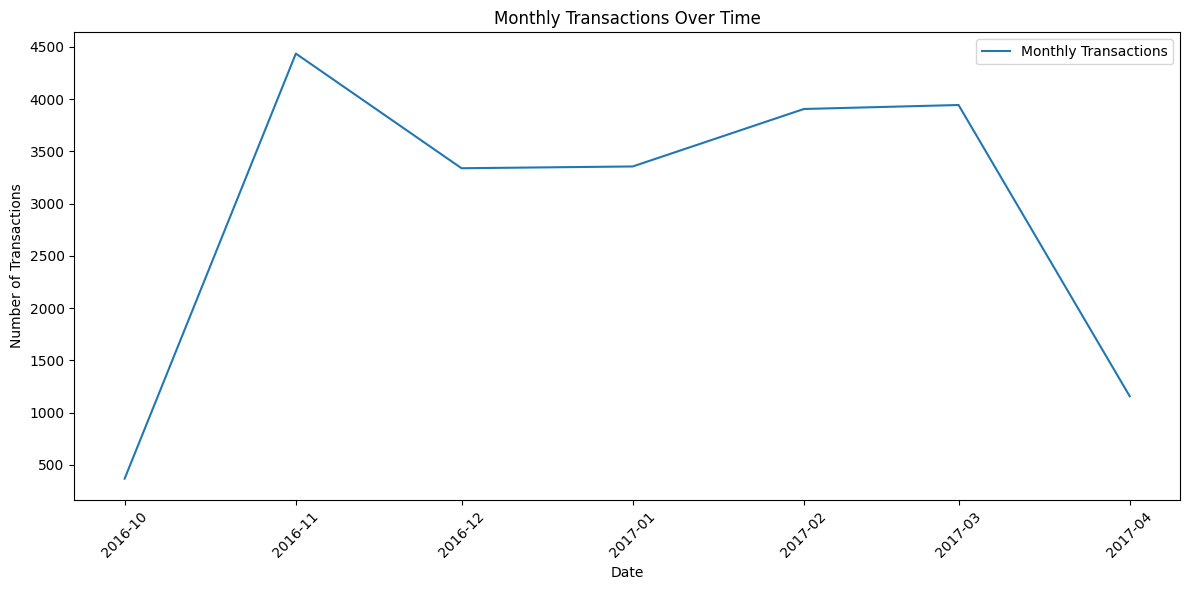

In [27]:
# 7
df['date'] = pd.to_datetime(df['date_time'])

monthly_transactions = df.groupby(['year', 'month']).size()

monthly_transactions = monthly_transactions.reset_index(name='Transaction Count')

monthly_transactions['date'] = pd.to_datetime(
    monthly_transactions[['year', 'month']].assign(Day=1)
)

plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions['date'], monthly_transactions['Transaction Count'], label='Monthly Transactions')

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transactions Over Time')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

8. It shows monthly transactions for each month. the highest transactions is in november 2016, and the lowest is october 2016

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [28]:
#9

weekday_names = df.loc[df['weekday_weekend'] == 'weekday', 'day_name'].unique()

weekend_names = df.loc[df['weekday_weekend'] == 'weekend', 'day_name'].unique()

print("Unique weekday names:", weekday_names)
print("Unique weekend names:", weekend_names)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [29]:
#10
df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month
df['day_name'] = df['date_time'].dt.day_name()

# Group and aggregate data
grouped = df.groupby(['month', 'day_name']).size().reset_index(name='total_transactions')

# Create the pivot table
pivot_table = grouped.pivot_table(index='month', columns='day_name', values='total_transactions', fill_value=0)

# Rearrange columns to follow the desired day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(columns=day_order)
pivot_table = pivot_table.astype(int)
# Display the result
pivot_table


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-29-ade159e13cab>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _____

transactions for each day every month. The highest transactions is when saturday because it is weekend, and the lowest is on month 10 probably because the store is closed.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


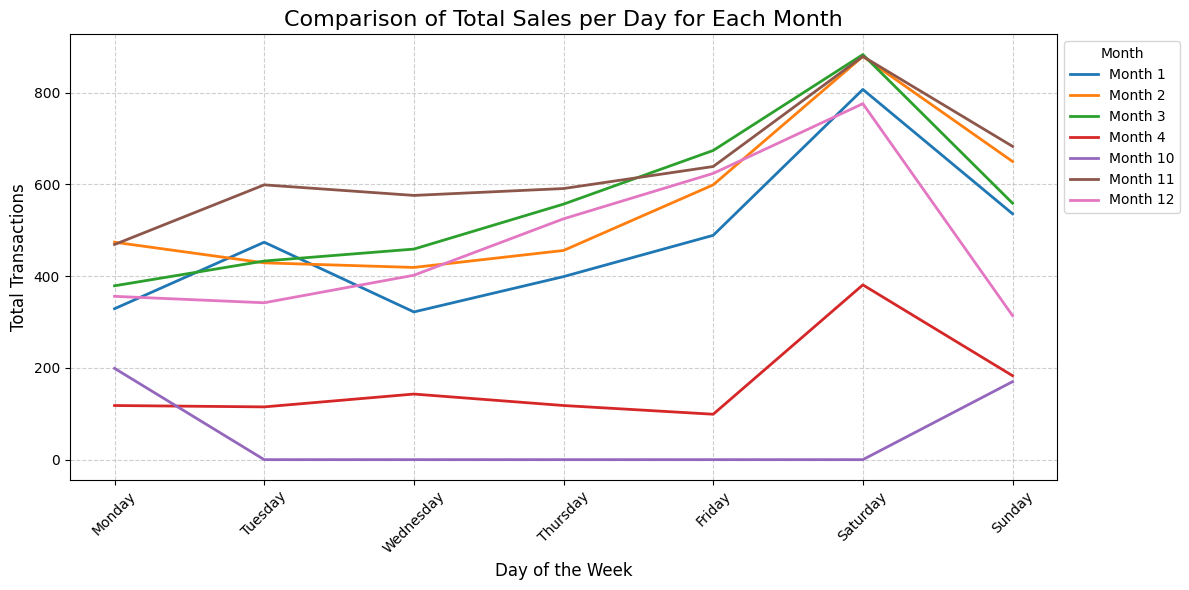

In [30]:
# 12

pivot_table_t = pivot_table.T

plt.figure(figsize=(12, 6))

for month in pivot_table_t.columns:
    plt.plot(pivot_table_t.index, pivot_table_t[month], label=f'Month {month}', linewidth=2, markersize=6)

plt.title('Comparison of Total Sales per Day for Each Month', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.

saturday has the highest transactions while wedneseday is the lowest.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [31]:
# 14
days_name = df['period_day'].unique()
print(days_name)

['morning' 'afternoon' 'evening' 'night']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [32]:
# 15
df['date_time'] = pd.to_datetime(df['date_time'])
df['hour'] = df['date_time'].dt.hour
hour_ranges = df.groupby('period_day')['hour'].unique()
print(hour_ranges)

period_day
afternoon    [12, 13, 14, 15, 16]
evening          [17, 18, 19, 20]
morning      [9, 10, 11, 8, 7, 1]
night                [21, 23, 22]
Name: hour, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


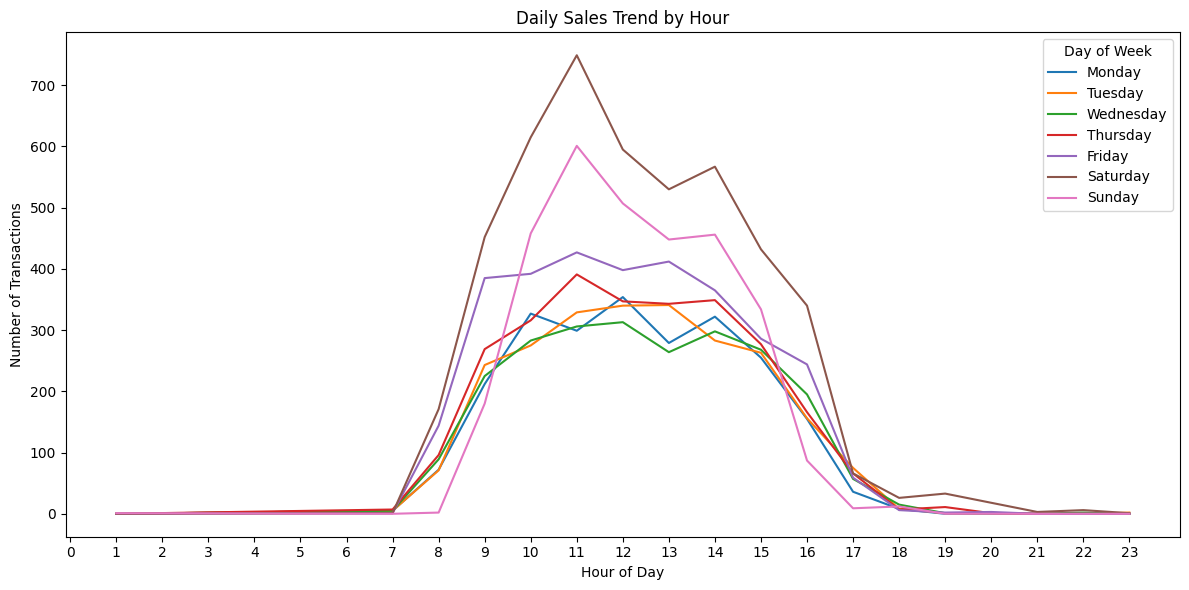

In [33]:
# 17
daily_hourly_sales = df.groupby(['day_name', 'hour'])['Transaction'].count().reset_index()
daily_hourly_sales = daily_hourly_sales.pivot(index='hour', columns='day_name', values='Transaction').fillna(0)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_hourly_sales = daily_hourly_sales[days_order]
daily_hourly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Daily Sales Trend by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.legend(title='Day of Week')
plt.tight_layout()
plt.show()

18. The daily sales trend plot reveals that _______

it shows the transactions for each hour everyday. The highest transactions is at 11 am and before 7am and after 21 pm there is no transactions because probably the store is closed.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


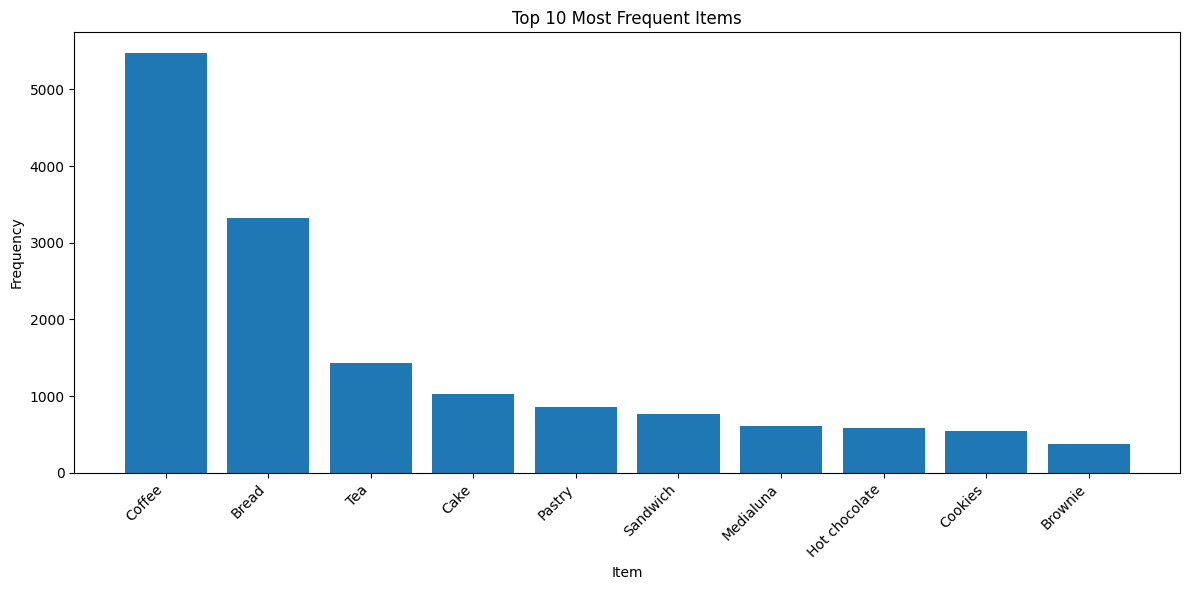

In [34]:
# 19
item_frequency = df.groupby('Item')['Transaction'].count().reset_index()

# Rename the 'Transaction' column to 'Frequency'
item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})

# Sort by frequency in descending order
item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)

# Create a bar plot for the top 10 items
plt.figure(figsize=(12, 6))
plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10))
plt.xlabel('Item')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Items')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-35-bc370f77e51b>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


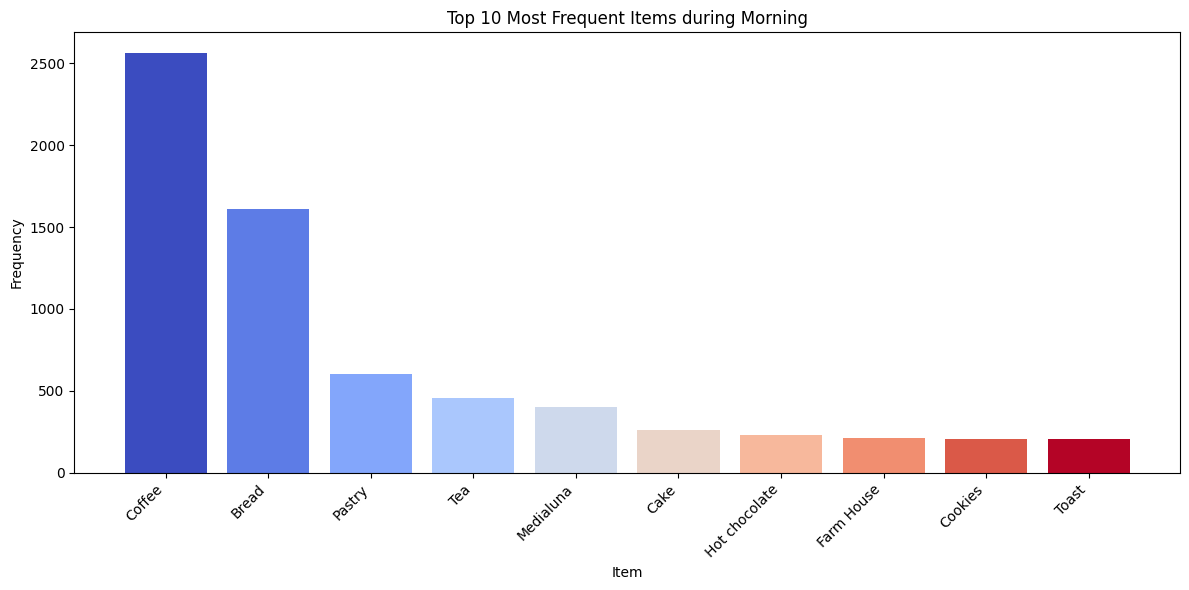

<ipython-input-35-bc370f77e51b>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


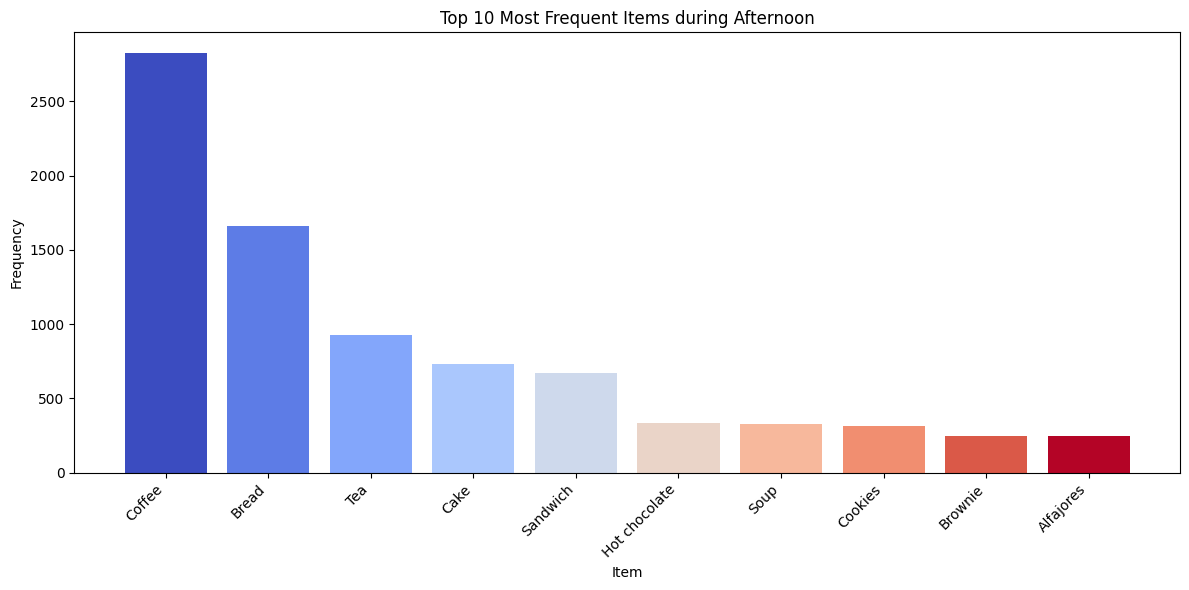

<ipython-input-35-bc370f77e51b>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


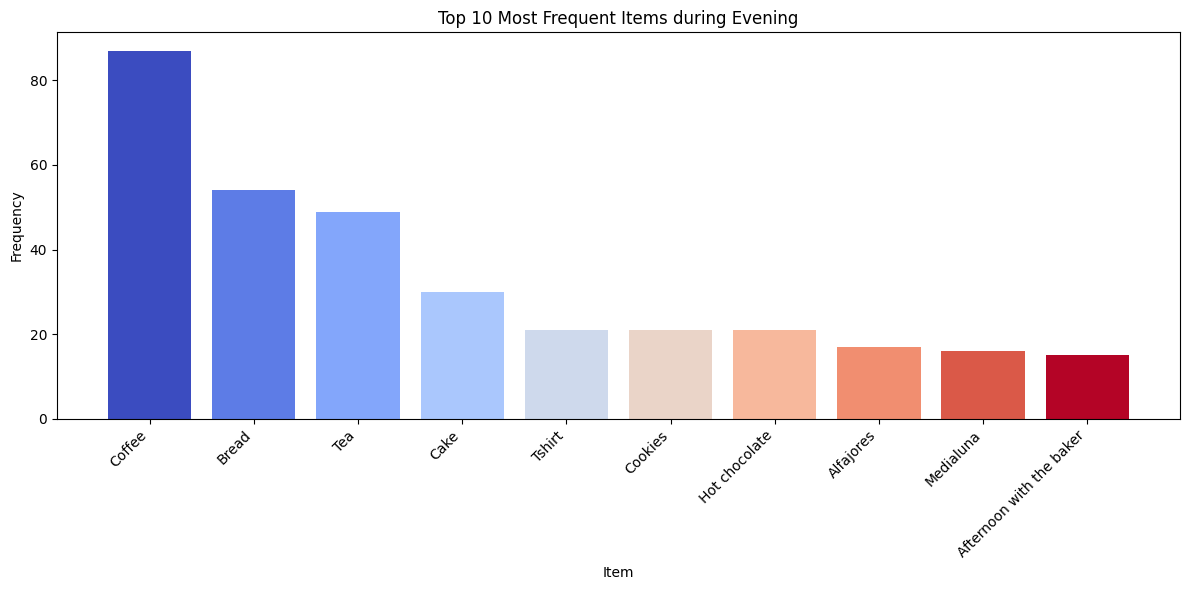

<ipython-input-35-bc370f77e51b>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap


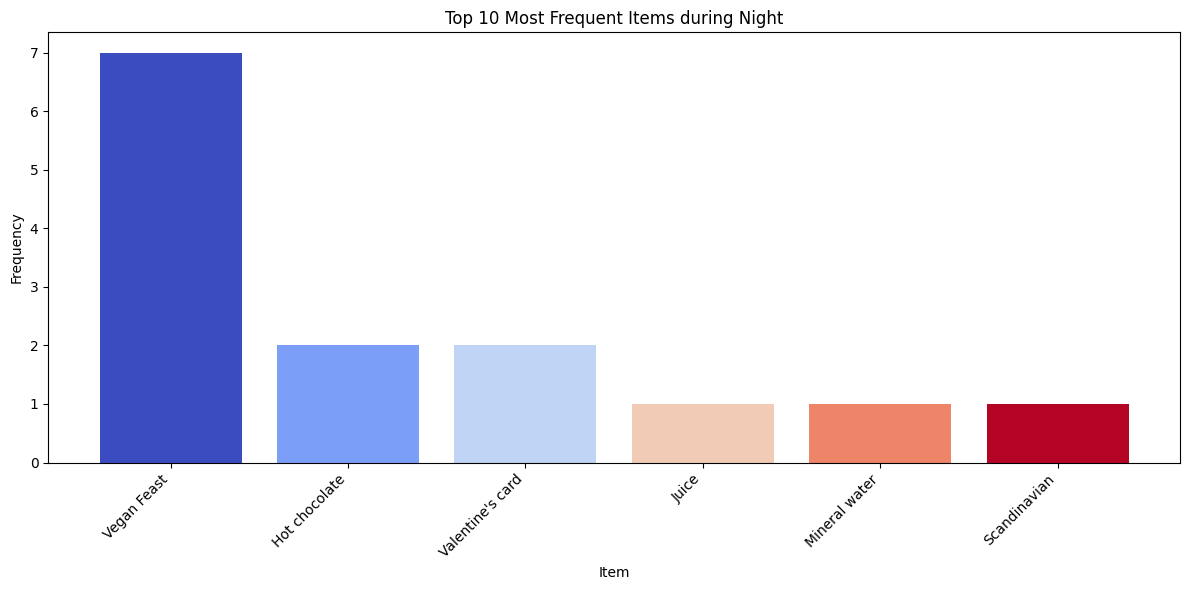

In [35]:
# 20
import matplotlib.cm as cm

def plot_top_items_by_period(period):
    # Filter data for the specified period
    period_data = df[df['period_day'] == period]

    # Group by item and count occurrences for the period
    item_frequency = period_data.groupby('Item')['Transaction'].count().reset_index()
    item_frequency = item_frequency.rename(columns={'Transaction': 'Frequency'})
    item_frequency = item_frequency.sort_values(by=['Frequency'], ascending=False)

    # Create a bar plot for the top 10 items in the period
    plt.figure(figsize=(12, 6)) # Fixed indentation here
    colors = cm.get_cmap('coolwarm', len(item_frequency.head(10))) # Get a colormap
    plt.bar(item_frequency['Item'].head(10), item_frequency['Frequency'].head(10),
            color=[colors(i) for i in range(len(item_frequency.head(10)))])
    plt.xlabel('Item')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Frequent Items during {period.capitalize()}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot for each period
for period in df['period_day'].unique():
    plot_top_items_by_period(period)

21. It turns out that there is something different in the plot above, the insight is ____


coffee is the product that has highest transactions during morning, afternoon, and evening. During night, there are only 6 items sold.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-36-6b9a075d9c51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date


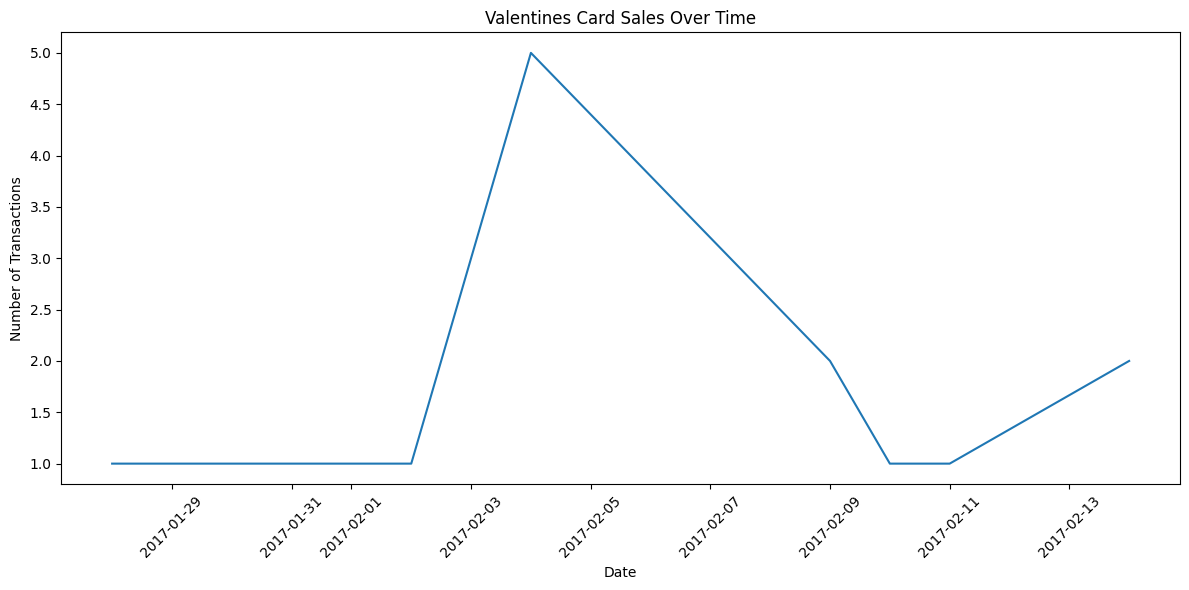

In [36]:
#22
valentine_sales = df[df['Item'].str.contains('Valentine', case=False, na=False)]

valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date
sales_by_date = valentine_sales.groupby('date').size()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, linestyle='-', label='Valentine Card Sales')

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Valentines Card Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


2017-02-04 has the highest sales of valentine's card. This could happen because people is preparing valenting 10 days before.


## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [37]:
# 24
apriori_data = pd.crosstab(df['Transaction'], df['Item'])
apriori_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#25
basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-38-e4fcc6d22040>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_data.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [39]:
# 26
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

output = frequent_itemsets[['support', 'itemsets']]

output

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [40]:
# 27
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
1,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
2,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
3,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
5,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
6,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
8,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



Coffee is a central item frequently purchased alongside various products like Cake, Toast, Medialuna, and Tea, making it a key focus for cross-promotion strategies. Among these, Toast and Coffee show the strongest pairing, indicating that customers buying Toast are very likely to also buy Coffee. Similarly, Cake and Tea have a notable relationship, suggesting an opportunity to bundle these items together. While Pastry and Bread are occasionally paired, their weak association means they are less significant for targeted promotions. On the other hand, Medialuna and Coffee form a meaningful combination that could be highlighted in marketing efforts to encourage additional sales. These insights can guide decisions on product placement, promotions, and bundling strategies.